## Classification

### KNighborsClassifier & KNighborsRegressor
用來實作KNN.
這兩種模型都可以用於分類和回歸問題。在KNeighborsClassifier中，每個樣本的類別是由其k個最近鄰居的類別決定的。在KNeighborsRegressor中，每個樣本的目標值是由其k個最近鄰居的目標值的平均值決定的。

- `n_neighbors` -> k值
  
- `weights` -> 給neighbors加權, uniform(每個neighbor 加權相同), distance(距離) or 自訂, 預設是uniform
  
- `algorithm` -> auto, ball_tree, kd_tree, brute, 預設是auto
  
- `leaf_size` -> 葉子的大小, 預設是30 (只有在algorithm是ball_tree or kd_tree才有用). 用來加速 (葉子越大, 計算越快, 但是準確度越低)
  
- `p` -> 1: 曼哈頓距離, 2: 歐幾里德距離, 預設是2

/var/folders/nx/572m25wj2z3f1lzmb7pl257c0000gn/T/ipykernel_13196/2226395517.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles.append(plt.scatter([], [], c=plt.cm.tab10(i), label=iris.target_names[i]))


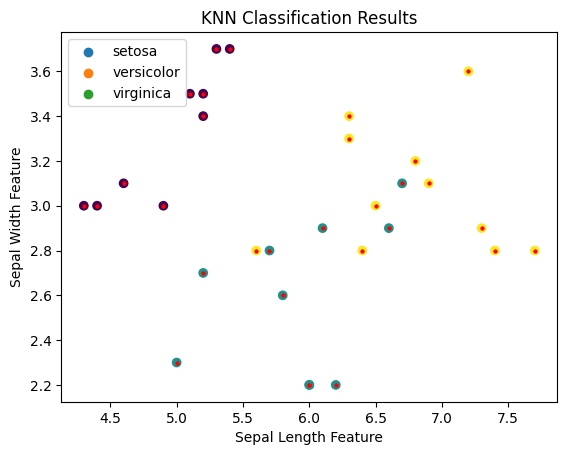

/var/folders/nx/572m25wj2z3f1lzmb7pl257c0000gn/T/ipykernel_13196/2226395517.py:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles.append(plt.scatter([], [], c=plt.cm.tab10(i), label=iris.target_names[i]))


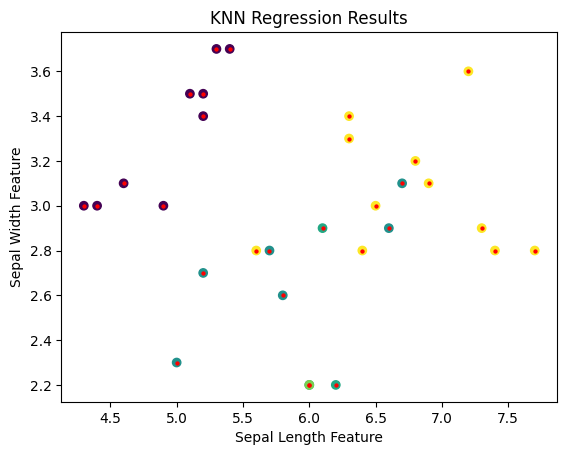

In [14]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# using iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', s=5, linewidths=2, c='red')

plt.xlabel('Sepal Length Feature')
plt.ylabel('Sepal Width Feature')
plt.title('KNN Classification Results')

# red markers are testing data points, other colors are predicted classes
handles = []
labels = []
for i in range(len(iris.target_names)):
    handles.append(plt.scatter([], [], c=plt.cm.tab10(i), label=iris.target_names[i]))
    labels.append(iris.target_names[i])
plt.legend(handles, labels)

plt.show()


reg = KNeighborsRegressor(n_neighbors=5)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', s=5, linewidths=2, c='red')

plt.xlabel('Sepal Length Feature')
plt.ylabel('Sepal Width Feature')
plt.title('KNN Regression Results')

handles = []
labels = []
for i in range(len(iris.target_names)):
    handles.append(plt.scatter([], [], c=plt.cm.tab10(i), label=iris.target_names[i]))
    labels.append(iris.target_names[i])

plt.show()

## Naïve Bayes Classifiers

### Guassian Naive Bayes
上課教的方法，適用於當特徵並非常態分佈或是 continuous data

- `priors`：用於指定每class的先驗概率(prior probability，指對類別分佈的預先假設)。預設為`None`，表示先驗概率從訓練數據中估計。

- `var_smoothing`：計算特徵變異數時避免除以零。如果變異數為零該參數會向添加smoothing。預設為`1e-9`。

In [27]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

from sklearn.preprocessing import LabelEncoder
weather = np.array(['sunny', 'sunny', 'rainy', 'cloudy', 'cloudy', 'sunny', 'rainy', 'cloudy', 'sunny', 'rainy'])
temperature = np.array(['hot', 'hot', 'mild', 'mild', 'cold', 'mild', 'cold', 'hot', 'mild', 'cold'])
activity = np.array(['not cancel', 'not cancel', 'not cancel', 'not cancel', 'cancel', 'not cancel', 'cancel', 'not cancel', 'not cancel', 'cancel'])

le = LabelEncoder()
weather_encoded = le.fit_transform(weather)
temperature_encoded = le.fit_transform(temperature)
activity_encoded = le.fit_transform(activity)

X = np.column_stack((weather_encoded, temperature_encoded))
y = activity_encoded

gnb = GaussianNB()
gnb.fit(X, y)

# predict dataset
y_pred = gnb.predict(X)
y_pred_decoded = le.inverse_transform(y_pred)

# print the probability estimates for each class during prediction
y_pred_proba = gnb.predict_proba(X)
for i in range(len(y_pred_proba)):
    print('Sample', i+1, 'probability estimates:', y_pred_proba[i])

# print the activity featurex's before and after the prediction
print('cancel', 'not cancel')
print('Activity feature before prediction:')
print(activity)
print('Activity feature after prediction:')
print(y_pred_decoded)

Sample 1 probability estimates: [0. 1.]
Sample 2 probability estimates: [0. 1.]
Sample 3 probability estimates: [0. 1.]
Sample 4 probability estimates: [0. 1.]
Sample 5 probability estimates: [9.99999599e-01 4.01207040e-07]
Sample 6 probability estimates: [0. 1.]
Sample 7 probability estimates: [9.99999478e-01 5.21983187e-07]
Sample 8 probability estimates: [0. 1.]
Sample 9 probability estimates: [0. 1.]
Sample 10 probability estimates: [9.99999478e-01 5.21983187e-07]
Activity feature before prediction:
['not cancel' 'not cancel' 'not cancel' 'not cancel' 'cancel' 'not cancel'
 'cancel' 'not cancel' 'not cancel' 'cancel']
Activity feature after prediction:
['not cancel' 'not cancel' 'not cancel' 'not cancel' 'cancel' 'not cancel'
 'cancel' 'not cancel' 'not cancel' 'cancel']


### MultinomialNB
類似GNB, but is more suitable for discrete data.

- `alpha`: 用來控制 smoothing 量. Smoothing 可以避免 zero probabilities 當feature沒有出現在特定的class. 預設是 `1.0`, 1.0 是 Laplace smoothing

- `fit_prior`: 預設是 `True`, 是否要用是否要學習 class prior

- `class_prior`: 類似 GNB 的 prior 參數

In [36]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

from sklearn.preprocessing import LabelEncoder
weather = np.array(['sunny', 'sunny', 'rainy', 'cloudy', 'cloudy', 'sunny', 'rainy', 'cloudy', 'sunny', 'rainy'])
temperature = np.array(['hot', 'hot', 'mild', 'mild', 'cold', 'mild', 'cold', 'hot', 'mild', 'cold'])
activity = np.array(['not cancel', 'not cancel', 'not cancel', 'not cancel', 'cancel', 'not cancel', 'cancel', 'not cancel', 'not cancel', 'cancel'])

le = LabelEncoder()
weather_encoded = le.fit_transform(weather)
temperature_encoded = le.fit_transform(temperature)
activity_encoded = le.fit_transform(activity)

X = np.column_stack((weather_encoded, temperature_encoded))
y = activity_encoded

mnb = MultinomialNB()
mnb.fit(X, y)

# predict dataset
y_pred = mnb.predict(X)
y_pred_decoded = le.inverse_transform(y_pred)

# print the probability estimates for each class during prediction
y_pred_proba = mnb.predict_proba(X)
for i in range(len(y_pred_proba)):
    print('Sample', i+1, 'probability estimates:', y_pred_proba[i])

# print the activity feature's before and after the prediction
print('Activity feature before prediction:')
print(activity)
print('Activity feature after prediction:')
print(y_pred_decoded)

Sample 1 probability estimates: [0.34843945 0.65156055]
Sample 2 probability estimates: [0.34843945 0.65156055]
Sample 3 probability estimates: [0.12933631 0.87066369]
Sample 4 probability estimates: [0.08259386 0.91740614]
Sample 5 probability estimates: [0.3 0.7]
Sample 6 probability estimates: [0.19685555 0.80314445]
Sample 7 probability estimates: [0.41422594 0.58577406]
Sample 8 probability estimates: [0.1641791 0.8358209]
Sample 9 probability estimates: [0.19685555 0.80314445]
Sample 10 probability estimates: [0.41422594 0.58577406]
Activity feature before prediction:
['not cancel' 'not cancel' 'not cancel' 'not cancel' 'cancel' 'not cancel'
 'cancel' 'not cancel' 'not cancel' 'cancel']
Activity feature after prediction:
['not cancel' 'not cancel' 'not cancel' 'not cancel' 'not cancel'
 'not cancel' 'not cancel' 'not cancel' 'not cancel' 'not cancel']


## Decision Trees Classification

### DecisionTreeClassifier & DesicionTreeRegressor
前者適合用來處理分類問題，後者處理 regression problem。 params 大多一樣
- `criterion` -> 用來評估 split 品質的方法 (GINI, entropy, log_loss), 預設是 GINI (Classifier)
- `criterion` -> (squared_error, friedman_mse, absolute_error, poisson), 預設是 squared_error (Regressor)

- `splitter` -> split node 的策略，可以是 best or random
- `max_depth` -> max depth of tree, 可以預防 overfitting, default = `None`
- `max_features` -> 可以是 int, float, auto, sqrt, log2, defualt = `None`, 考慮best split 時考慮的特徵數

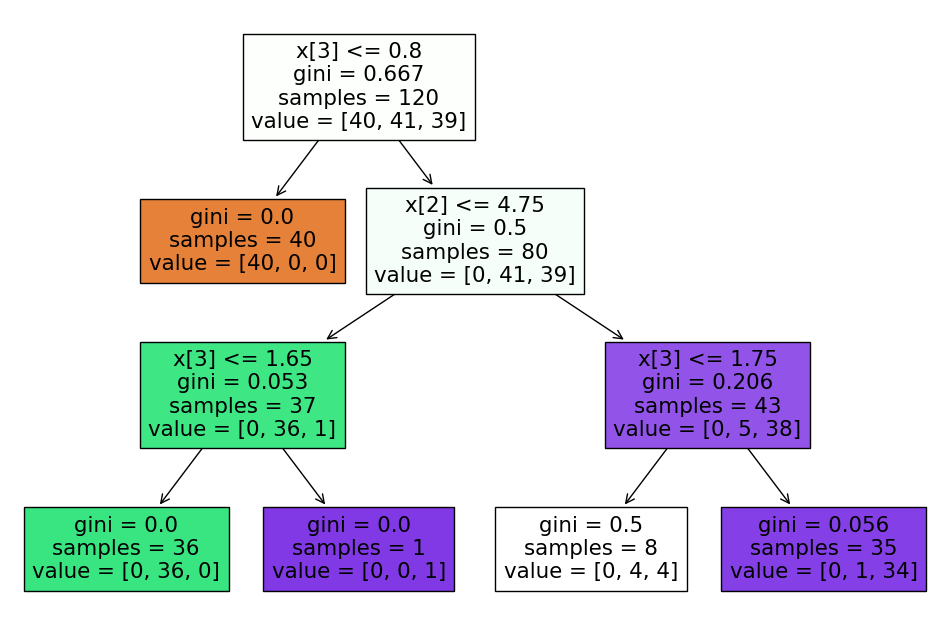

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# plot decision tree using plot_tree function
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()

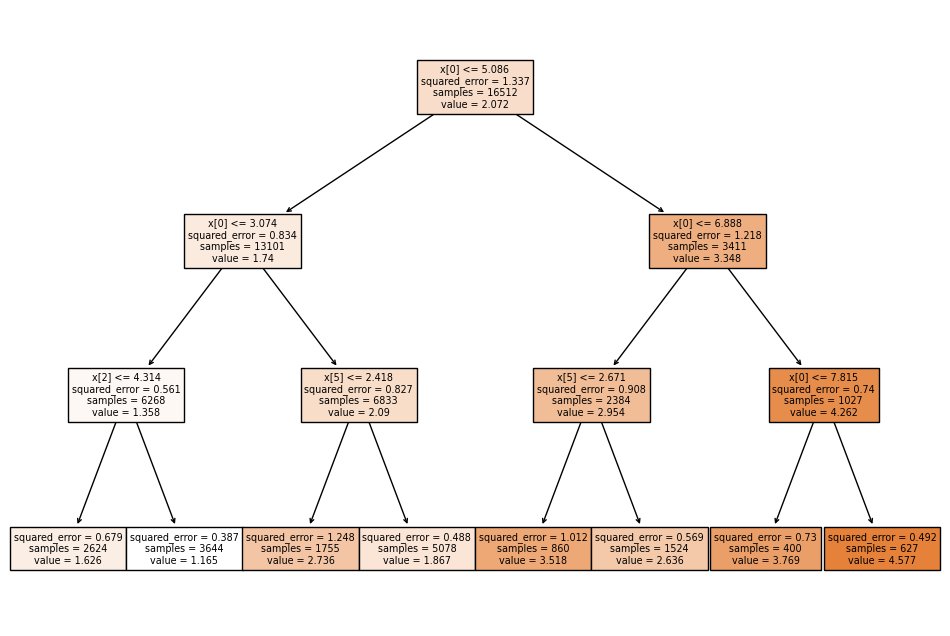

In [53]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(reg, filled=True)
plt.show()

### 以下除了 iris dataset, 所有的 dummy data 用這兩行生成

Classification: `X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=42)`  
  

Regression: `X, y = make_regression(n_samples=100, n_features=2, n_informative=2, random_state=42)`


## SVM Classification

### SVC
Support Vector Classification

- `C` -> float, default = 1.0 在 max margin 和 error rate 之間的取捨。Smaller C 可以有 wider margin 但也可能會有更高的error rate
  
- `kernel` -> 用哪種方法來分類: linear, polynomial, RBF, sigmoid, precomputed
  
- `gamma` -> 決定kernel function 的 shape. Small gamma -> wide kernel 可以是 scale(default), auto, float. 
  
- `tol` -> 停止標準的tolerance 
  
- `max_iter` -> iteration limit for solver. 預設 -1 (no limit)


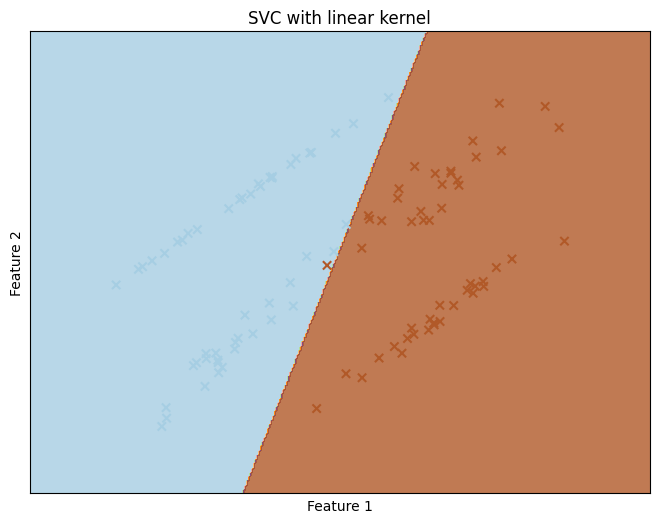

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# dummy data
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

svc = svm.SVC(kernel='linear', C=1.0)

# train the model
svc.fit(X, y)

# predict
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('SVC with linear kernel')
plt.show()

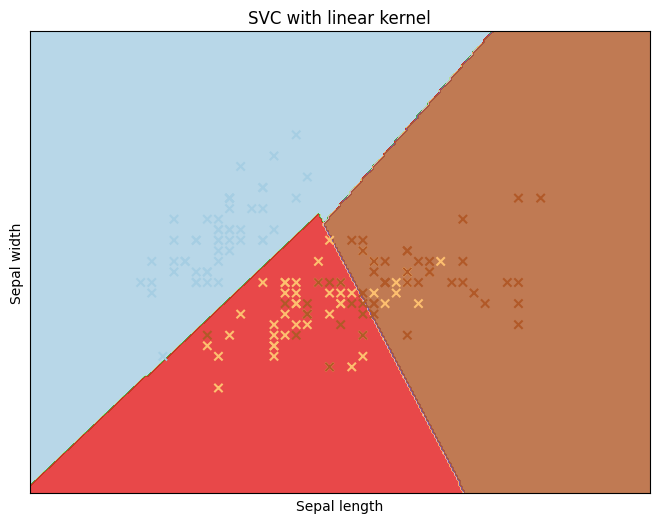

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()

# select the first two features (sepal width and length)
X = iris.data[:, :2]
y = iris.target

# create a mesh to plot
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

svc = svm.SVC(kernel='linear', C=1.0)

# train the model
svc.fit(X, y)

# predict
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='x')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('SVC with linear kernel')
plt.show()

### LinearSVC
類似 SVC kernel = 'linear'，但是使用上更有彈性。可以針對 penalty 與 loss function 做更多調整，對數量比較大的樣本效果也更好。

- `penalty` -> l1 or l2, default = l2. l2 是svc 通常在用的
  
- `loss` -> hinge or squared_hinge. hinge is 標準 svc loss
  
- `dual` -> auto or boolean type. 預設是True. 決定解決 dual 或是 primal optimization problem

## ANN Classification

### MLPClassifier
Multi-Layer Perception. 

- `hidden_layer_sizes` -> default = (100,). 每一層hidden layer 中的節點數。size 越大越精準，但計算成本越高

- `activation` -> 隱藏節點使用的 activation funtion. (identity, logistic, relu, tanh). 預設是relu.
 
- `solver` -> 用來訓練模型的演算法, 可以優化加權方法。(lbfgs, sgd, adam) 預設是adam
 
- `learning-rate` -> rate shcedule for weight update. (constant, invscaling, adaptive) 預設是constant.
 
- `max_iter` -> max iteration for the solver. 

/var/folders/nx/572m25wj2z3f1lzmb7pl257c0000gn/T/ipykernel_13196/184324241.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='black', marker='x', s=20)


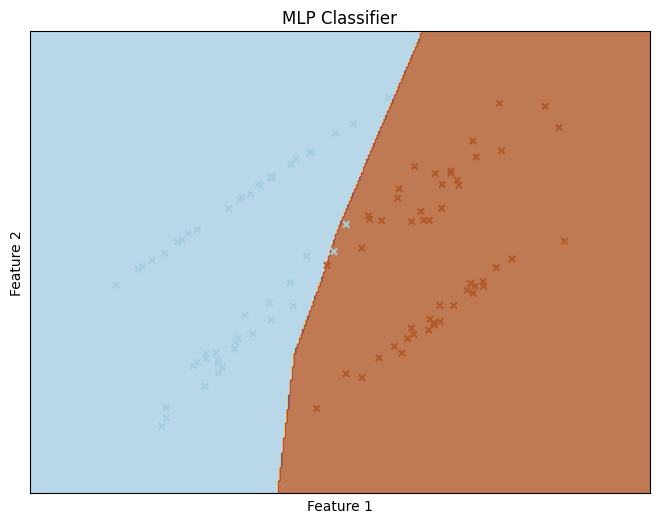

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# dummy dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000)
clf.fit(X_train, y_train)

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='x', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('MLP Classifier')
plt.show()

### MLPRegressor
主要參數差不多

/Users/pat/Desktop/code/Github/DataMiningNTNU/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


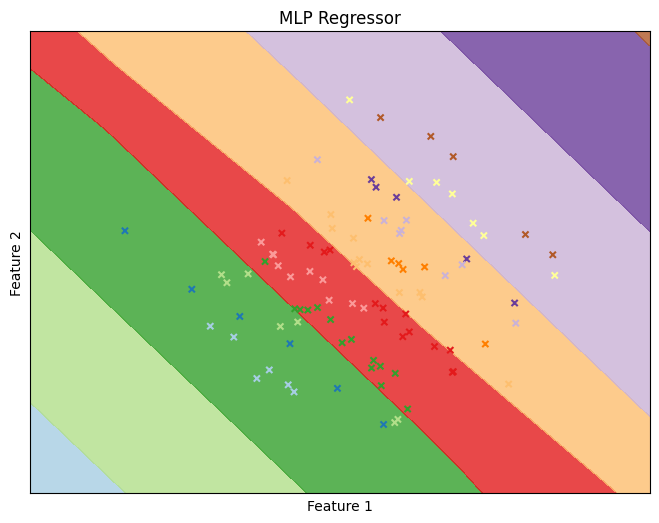

In [70]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=100, n_features=2, n_informative=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = MLPRegressor(hidden_layer_sizes=(5, 2), max_iter=1000)
reg.fit(X_train, y_train)

h = 0.02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='x', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('MLP Regressor')
plt.show()

## Ensemble Classifier

### RandomForestClassifier
他會訓練多個 decision trees base on 隨機的 subsets. 最後再結合每個樹的預測來做 final predict.

- `n_estimators` -> 森林中樹的數目
  
- `criterion` -> gini, entropy, log_loss. Default = gini
  
- `max_depth` -> 樹的max depth, max depth 過大可能會 over fitting
  
- `min_samples_leaf` -> min samples at leaf node. 增加這個 param 可以避免 overfitting, 但也可能導致 underfitting.

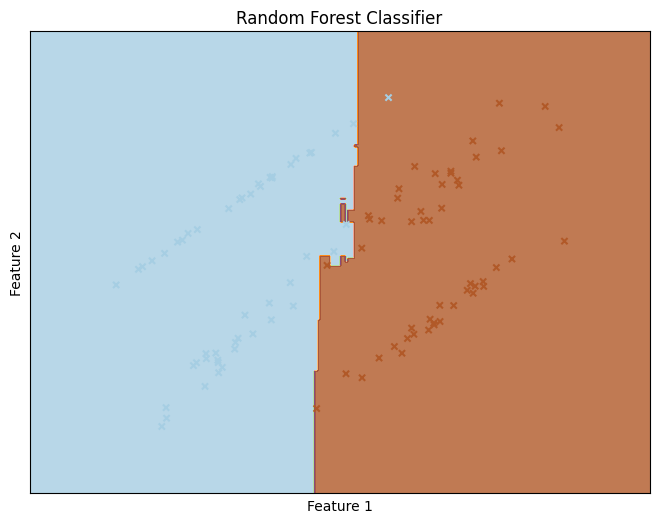

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train, y_train)

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# make predictions
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='x', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Random Forest Classifier')
plt.show()

### RandomForestRegressor
預測regression problems. 主要參數跟 RandomForestClassifier 差不多.

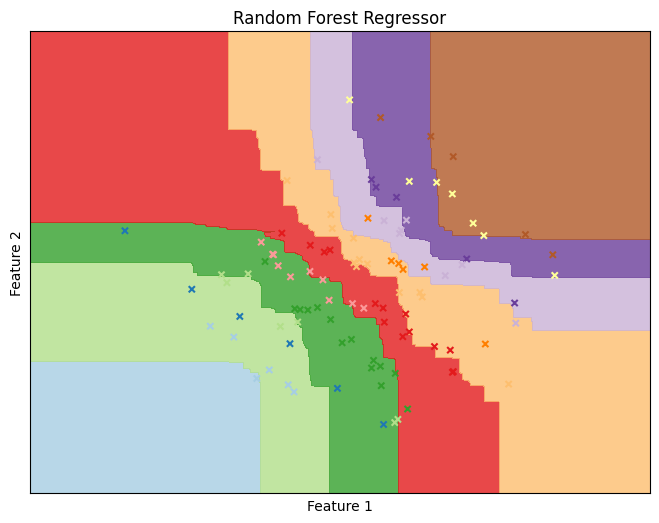

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=100, n_features=2, n_informative=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = RandomForestRegressor(n_estimators=100, max_depth=3)
reg.fit(X_train, y_train)

h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='x', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Random Forest Regressor')
plt.show()


### GradientBoostingClassifier & GradientBoostingRegressor 
Gradient boosting 會結合多個弱模型來 build 一個更強的模型。這些弱模型通常都是 decision trees.  

- `n_estimators` -> 樹的數目, 一樣增加 n 會更精準但更耗費運算資源, default = 100
  
- `learning_rate` -> 控制每個tree對模型的貢獻, default = 0.01
  
- `criterion` -> 評估 split 的品質, (friedman_mse, squared_error), default = friedman_mse

- `max_depth` -> max depth of each tree, default = 3

- `min_samples_leaf` -> min samples at a leaf.

- `max_features` -> (sqrt, log2, int, float), default = None

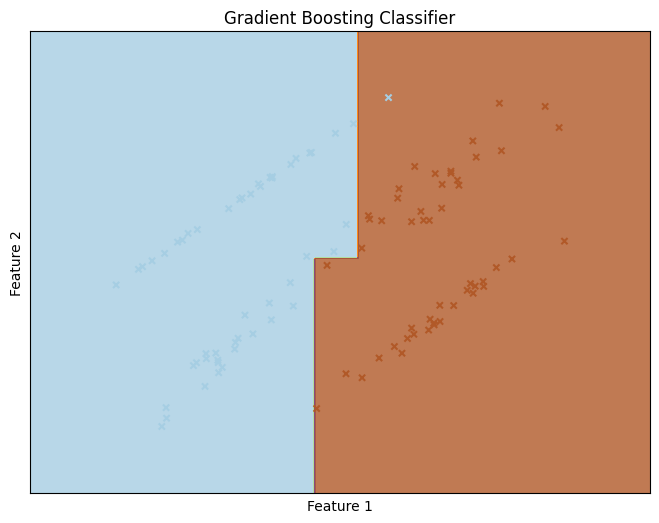

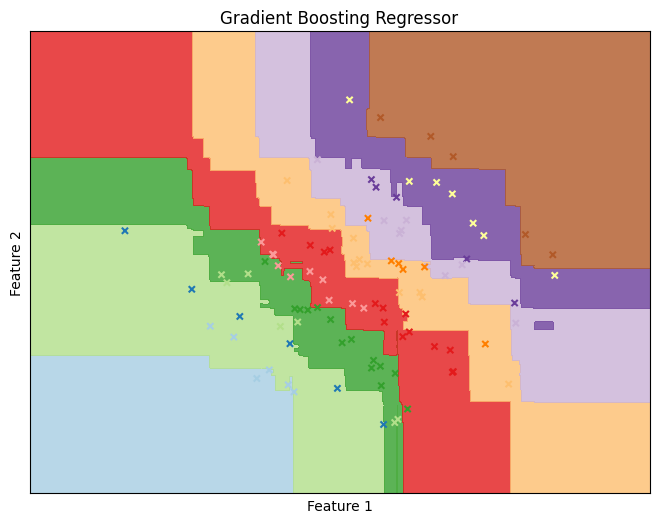

In [71]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X_c, y_c = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

X_r, y_r = make_regression(n_samples=100, n_features=2, n_informative=2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

clf = GradientBoostingClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train_c, y_train_c)

h = 0.02
x_min, x_max = X_c[:, 0].min() - 1, X_c[:, 0].max() + 1
y_min, y_max = X_c[:, 1].min() - 1, X_c[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z_c = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_c = Z_c.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_c, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_c[:, 0], X_c[:, 1], c=y_c, cmap=plt.cm.Paired, marker='x', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Gradient Boosting Classifier')
plt.show()

reg = GradientBoostingRegressor(n_estimators=100, max_depth=3)
reg.fit(X_train_r, y_train_r)

h = 0.02
x_min, x_max = X_r[:, 0].min() - 1, X_r[:, 0].max() + 1
y_min, y_max = X_r[:, 1].min() - 1, X_r[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z_r = reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_r = Z_r.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_r, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_r[:, 0], X_r[:, 1], c=y_r, cmap=plt.cm.Paired, marker='x', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Gradient Boosting Regressor')
plt.show()

## Evaluation

### KFold
K-Fold Cross Validation.將資料 split 成 k consecutive fold, 用來評估模型在未知資料上的表現。很耗費運算資源。

- `n_splits` -> fold 的次數, 至少為5

- `shuffle` -> 資料是否要在split 之前 shuffle, default = False

In [5]:
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []

for train, test in kfold.split(X, y):

    model = LogisticRegression()

    model.fit(X[train], y[train])

    scores = model.score(X[test], y[test])
    acc_per_fold.append(scores * 100)

    fold_no = fold_no + 1

print('------------------------------------------------------------------------')
print('Score for each fold')

for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Accuracy: {acc_per_fold[i]}%')
    
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score for each fold
------------------------------------------------------------------------
> Fold 1 - Accuracy: 96.66666666666667%
------------------------------------------------------------------------
> Fold 2 - Accuracy: 96.66666666666667%
------------------------------------------------------------------------
> Fold 3 - Accuracy: 93.33333333333333%
------------------------------------------------------------------------
> Fold 4 - Accuracy: 93.33333333333333%
------------------------------------------------------------------------
> Fold 5 - Accuracy: 100.0%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 96.0 (+- 2.4944382578492967)
------------------------------------------------------------------------


c:\Users\Patrick\Documents\GitHub\DataMiningNTNU\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Patrick\Documents\GitHub\DataMiningNTNU\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

### ShuffleSplit
也是一種 cross-validator. 會生成一些指定數目的 train/test dataset splits. Samples 會先被 shuffle 再被split 成 train/test.

- `n_splits` -> re-fhuffle + splitting 次數, default = 10
  
- `test_size` -> default = 0.1
  
- `train_size` -> 類似 test size, 但是是要用在 train split 的資料比例

In [6]:
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

ssplit = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

acc_per_split = []

for train_index, test_index in ssplit.split(X):
    model = LogisticRegression()
    model.fit(X[train_index], y[train_index])

    # Generat generalization metrics
    scores = model.score(X[test_index], y[test_index])
    acc_per_split.append(scores * 100)

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per split')

for i in range(0, len(acc_per_split)):
    print('------------------------------------------------------------------------')
    print(f'> Split {i+1} - Accuracy: {acc_per_split[i]}%')

print('------------------------------------------------------------------------')
print('Average scores for all splits:')
print(f'> Accuracy: {np.mean(acc_per_split)} (+- {np.std(acc_per_split)})')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per split
------------------------------------------------------------------------
> Split 1 - Accuracy: 97.36842105263158%
------------------------------------------------------------------------
> Split 2 - Accuracy: 94.73684210526315%
------------------------------------------------------------------------
> Split 3 - Accuracy: 94.73684210526315%
------------------------------------------------------------------------
> Split 4 - Accuracy: 92.10526315789474%
------------------------------------------------------------------------
> Split 5 - Accuracy: 97.36842105263158%
------------------------------------------------------------------------
Average scores for all splits:
> Accuracy: 95.26315789473685 (+- 1.9692933614599675)
------------------------------------------------------------------------


c:\Users\Patrick\Documents\GitHub\DataMiningNTNU\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Patrick\Documents\GitHub\DataMiningNTNU\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

### confusion_matrix / classification_report / f1_score / precision_recall_curve
這些都是用來評估 classificatio model 型表現的方法
常用的參數: 
- `y_true`-> 正確的目標 value or label
  
- `y_pred`-> 模型預測的 value or label

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_curve

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nF1 Score: ", f1_score(y_test, y_pred, average='weighted'))



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


F1 Score:  1.0


c:\Users\Patrick\Documents\GitHub\DataMiningNTNU\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
